In [84]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel
from bitcoin_deep_learning.trainer import train, read_result
from bitcoin_deep_learning.cross_val import cross_val
api = ApiCall()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
#from google.colab import drive
#drive.mount('/content/drive')

In [74]:
import requests 
import pandas as pd
import numpy as np
import sys; sys.path
import datetime
import pandas as pd
import numpy as np 
from datetime import datetime
from datetime import datetime
from tqdm import tqdm
import random

from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel
from bitcoin_deep_learning.trainer import train
from bitcoin_deep_learning.cross_val import cross_val

%load_ext autoreload
%autoreload 2
from bitcoin_deep_learning.call_api import ApiCall
from bitcoin_deep_learning.model import LinearRegressionBaselineModel, RnnDlModel
from bitcoin_deep_learning.trainer import train
from bitcoin_deep_learning.cross_val import cross_val,fold_indexes,sequence_indexes


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
train_df = ApiCall().read_local()
print((9014.026207-8222.753649)/9014.026207)
print((8799.121911-8677.910527)/8799.121911)
train_df.head(20)


0.08778236714971208
0.013775395457184293


,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[%]_Bitcoin_growth_rate_on_Horizon=7,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7.1
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.0,2000.0,842398,377,257504,27026398,...,-0.235616,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.235616
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.0,2100.0,854253,385,235750,26955617,...,-0.260491,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.260491
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.0,1975.0,714655,384,194733,26886977,...,-0.230759,40,4173275,1692828,542447,132021,15812,1523,9208.459919,-0.230759
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.0,2225.0,720904,349,173509,26753036,...,-0.418350,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.418350
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.5,2312.5,903239,338,216178,26562089,...,-0.617751,11,4036425,1668996,541030,131987,15813,1519,6891.934414,-0.617751
5,2018-02-06,2.199977e+19,825,5613.582892,16850437.5,2125.0,999110,358,243950,26426352,...,-0.288206,8,4034268,1663664,537892,131953,15822,1525,7714.392057,-0.288206
6,2018-02-07,2.004877e+19,824,5619.041374,16852200.0,1762.5,814500,453,213578,26340551,...,-0.331605,36,4024022,1659967,538766,131816,15782,1521,7575.611197,-0.331605
7,2018-02-08,1.876627e+19,823,5626.039833,16853837.5,1637.5,746341,435,173158,26217915,...,-0.096230,30,4010185,1662072,539783,131822,15806,1527,8222.753649,-0.096230
8,2018-02-09,1.919364e+19,822,5639.520131,16855525.0,1687.5,775346,483,177725,26145417,...,-0.013968,44,4006306,1666049,540436,131315,15745,1529,8677.910527,-0.013968
9,2018-02-10,2.043647e+19,821,5643.008314,16857312.5,1787.5,741833,426,181640,26044328,...,-0.078603,54,3992860,1670898,539736,131438,15733,1533,8537.393208,-0.078603


In [ ]:
plt.plot(df["[%]"])

In [127]:
(X_train_list, Y_train_list, X_test_list,Y_test_list) = get_cross_XY(data="train")


32


In [168]:
model = LinearRegressionBaselineModel(alpha=0.1,l1_ratio=0.001)
#model = LinearRegressionBaselineModel(alpha=50,l1_ratio=0.01)
folf_score,score = train(model,train_df)
print(fold_score,score)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:06<00:00,  5.60it/s]


Training done
[25.11065, 40.48095, 72.67151, 43.94785, 11.77665, 34.83829, 57.82235, 63.08738, 66.34564, 29.20328, 20.43035, 22.46888, 60.14261, 842.76034, 2000.52293, 1453.94488, 56.86854, 18.818, 24.60637, 24.41708, 57363387598.00065, 31251929429499.957, 37608356950071.5, 3037.49666, 47.81047, 121.95399, 243.33564, 264.62119, 77.54508, 40.13575, 21.42994, 16.17604] 521.8495


In [169]:
from sklearn.metrics import mean_squared_error
index = np.array(fold_score).argmax()
X_test = X_test_list[index]
X_train = X_train_list[index]
Y_test = Y_test_list[index]
Y_train = Y_train_list[index]
Y_pred = model.run(X_test,X_train,Y_train)
Y_pred

array([-0.02630111, -0.03254467, -0.04198534, -0.02306785, -0.04978923,
       -0.05900592, -0.05848577, -0.0432793 , -0.0478086 , -0.0654983 ,
       -0.04491389, -0.04127051, -0.0470008 , -0.04600836, -0.02244722,
       -0.06409012, -0.03963818, -0.06424018, -0.04803809, -0.04662983,
       -0.04113677, -0.04744104, -0.04302158, -0.03269229, -0.02717079,
       -0.02882112, -0.03112948, -0.04103573, -0.04916053, -0.04584597,
       -0.04597516, -0.046636  , -0.07262806, -0.0796748 , -0.06123465,
       -0.0332509 , -0.04593866, -0.05747935, -0.02205847, -0.05695871,
       -0.05580723, -0.07050614, -0.08088625, -0.08806685, -0.11968727,
       -0.1252025 , -0.09419218, -0.10265789, -0.12478159, -0.12487871,
       -0.1212661 , -0.17155709, -0.16281636, -0.14748585, -0.14186333,
       -0.16428804, -0.12820465, -0.11281237, -0.13194851, -0.14153962,
       -0.14493571, -0.13070204, -0.10706886, -0.12738202, -0.14058118,
       -0.12096466, -0.07604594, -0.09116362, -0.10512949, -0.08

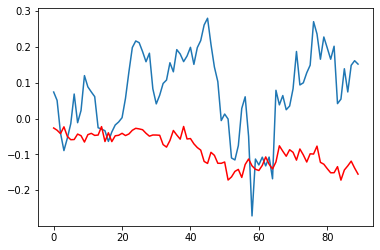

In [170]:
plt.plot(Y_test)
plt.plot(Y_pred,color="r")

In [178]:
df = ApiCall()

(263, 90, 32)

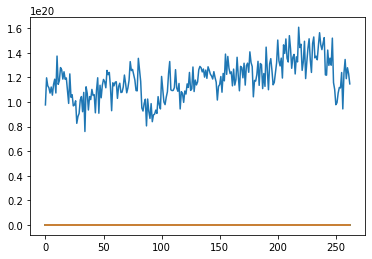

In [175]:
plt.plot(X_train[:,-1]);
#plt.plot(Y_train)

In [166]:
index = 0
X_test = X_test_list[index]
X_train = X_train_list[index]
Y_test = Y_test_list[index]
Y_train = Y_train_list[index]
Y_pred = model.run(X_test,X_train,Y_train)
from bitcoin_deep_learning.model import RnnDlModel
model = RnnDlModel(epochs=2)
Y_pred = model.run(X_test,X_train,Y_train)

In [167]:
Y_pred

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

In [98]:
X_train_list,Y_train_listget_cross_XY()

32


([array([[[ 2.05410932e+19,  8.30000000e+02,  5.64290322e+03, ...,
            1.52900000e+03,  9.01402621e+03, -9.62296320e-02],
          [ 2.17082412e+19,  8.29000000e+02,  5.64169553e+03, ...,
            1.52100000e+03,  8.79912191e+03, -1.39678074e-02],
          [ 2.07391938e+19,  8.28000000e+02,  5.64101513e+03, ...,
            1.52300000e+03,  9.20845992e+03, -7.86032334e-02],
          ...,
          [ 3.16612395e+19,  7.43000000e+02,  5.72810731e+03, ...,
            1.54200000e+03,  9.41509000e+03,  2.40132936e-02],
          [ 3.11301327e+19,  7.42000000e+02,  5.72907144e+03, ...,
            1.53900000e+03,  9.24719000e+03,  1.30898713e-02],
          [ 3.14666852e+19,  7.41000000e+02,  5.72871501e+03, ...,
            1.53600000e+03,  9.10553000e+03,  1.55917728e-02]],
  
         [[ 2.17082412e+19,  8.29000000e+02,  5.64169553e+03, ...,
            1.52100000e+03,  8.79912191e+03, -1.39678074e-02],
          [ 2.07391938e+19,  8.28000000e+02,  5.64101513e+03, ...,
    

In [113]:
df = ApiCall().get_clean_data()
df

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:35<00:00,  1.31s/it]


,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[%]_Bitcoin_growth_rate_on_Horizon=7,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.00,2000.00,842398,377,257504,27026398,...,-0.235616,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.235616
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.00,2100.00,854253,385,235750,26955617,...,-0.260491,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.260491
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.00,1975.00,714655,384,194733,26886977,...,-0.230759,40,4173275,1692828,542447,132021,15812,1523,9208.459919,-0.230759
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.00,2225.00,720904,349,173509,26753036,...,-0.418350,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.418350
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.50,2312.50,903239,338,216178,26562089,...,-0.617751,11,4036425,1668996,541030,131987,15813,1519,6891.934414,-0.617751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,2022-03-03,2.064166e+20,787,108571.458445,18973756.25,925.00,1010962,406,268096,40305260,...,0.097827,39,6212453,2541881,673980,130265,13665,2173,42459.603766,0.097827
1492,2022-03-04,1.888939e+20,786,108513.039108,18974625.00,868.75,959692,497,261962,40317760,...,-0.001783,33,6215236,2543804,674297,130327,13678,2172,39146.884469,-0.001783
1493,2022-03-05,1.686245e+20,785,108708.531831,18975393.75,768.75,810397,439,225198,40364804,...,0.009345,22,6220929,2546247,674715,130236,13668,2173,39416.462688,0.009345
1494,2022-03-06,1.789926e+20,784,108870.777114,18976212.50,818.75,776309,543,206985,40386891,...,0.018275,22,6226429,2547136,674912,130412,13660,2171,38423.618936,0.018275


In [114]:
ApiCall().data_to_csv(df)
ApiCall().save_train_val_test_split(df)

In [120]:
ApiCall().read_local(data="train")

,date,[AVG]_[NH]_mean_hash_rate,[+]_[NH]_Days_Till_Halving,[//]_[AV]_Stock-to-Flow_Ratio,[+]_[NH]_Circulating_Supply,[+]_[NH]_Issuance,[+]_[NH]_Number_of_Active_Addresses,[+]_[NH]_Mean_Block_Interval,[+]_[NH]_Number_of_Transactions,[+]_[NH]_Number_of_Addresses_with_a_Non-Zero_Balance,...,[//]_[AV]_Realized_Profits-to-Value_(RPV)_Ratio,fear_greed_value,[+]_[NH]_Number_of_Addresses_with_Balance_0.01 - 0.1,[+]_[NH]_Number_of_Addresses_with_Balance_0.1 - 1,[+]_[NH]_Number_of_Addresses_with_Balance_1 - 10,[+]_[NH]_Number_of_Addresses_with_Balance_10 - 100,[+]_[NH]_Number_of_Addresses_with_Balance_100 - 1k,[+]_[NH]_Number_of_Addresses_with_Balance_1k - 10k,[+]_[T]_Bitcoin_Price,[%]_Bitcoin_growth_rate_on_Horizon=7
0,2018-02-01,2.054109e+19,830,5642.903220,16839700.00,2000.00,842398,377,257504,27026398,...,0.003691,30,4226306,1722331,544769,132314,15779,1529,9014.026207,-0.235616
1,2018-02-02,2.170824e+19,829,5641.695528,16841800.00,2100.00,854253,385,235750,26955617,...,0.002557,15,4198274,1704275,543489,132213,15815,1521,8799.121911,-0.260491
2,2018-02-03,2.073919e+19,828,5641.015128,16843775.00,1975.00,714655,384,194733,26886977,...,0.001970,40,4173275,1692828,542447,132021,15812,1523,9208.459919,-0.230759
3,2018-02-04,2.280248e+19,827,5632.191528,16846000.00,2225.00,720904,349,173509,26753036,...,0.005174,24,4103680,1674480,540698,132009,15830,1532,8176.460616,-0.418350
4,2018-02-05,2.411984e+19,826,5626.186626,16848312.50,2312.50,903239,338,216178,26562089,...,0.003859,11,4036425,1668996,541030,131987,15813,1519,6891.934414,-0.617751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,2021-12-03,1.895333e+20,877,107683.375209,18890443.75,1050.00,1009846,335,289971,39196439,...,0.001035,31,6033537,2468409,663251,132374,13950,2057,53765.796483,0.000076
1402,2021-12-04,1.690595e+20,876,107627.370170,18891412.50,968.75,966373,365,253519,39269124,...,0.001798,25,6045160,2473113,664015,132441,13979,2061,48962.920993,-0.113946
1403,2021-12-05,1.869669e+20,875,107497.322411,18892450.00,1037.50,966666,342,215047,39150342,...,0.001013,18,6056667,2476280,664358,132558,13969,2067,49174.902908,-0.163230
1404,2021-12-06,1.883618e+20,874,107272.444575,18893525.00,1075.00,1059561,358,284295,39078981,...,0.002166,16,6056432,2478318,664726,132764,13971,2059,50492.435596,-0.145044
